In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from pandas.plotting import parallel_coordinates
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme(style="whitegrid", palette="Set2")

DATA_PATH = "../data/processed/"
master = pd.read_csv(DATA_PATH + "MASTER_statewise_core_crime_dataset.csv")
kidnap_cat = pd.read_csv(DATA_PATH + "KIDNAPPING_categorywise_dataset.csv")
sll_foreign = pd.read_csv(DATA_PATH + "SLL_and_ForeignUndertrials_dataset.csv")


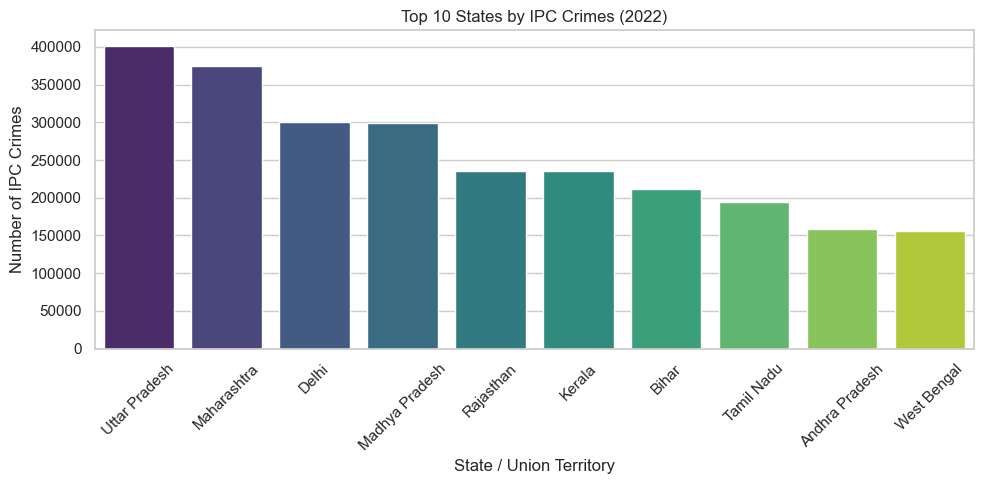

In [7]:
#Bar – Top IPC Crime States
# remove aggregate rows
clean_master = master[
    ~master["state_ut"].str.contains(
        "total|india|all india",
        case=False,
        na=False
    )
]

top10 = clean_master.sort_values("2022", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    data=top10,
    x="state_ut",
    y="2022",
    hue="state_ut",      # explicitly assign hue
    palette="viridis",
    legend=False         # legend not needed
)

plt.title("Top 10 States by IPC Crimes (2022)")
plt.xlabel("State / Union Territory")
plt.ylabel("Number of IPC Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




The distribution indicates that a small number of populous states account for a disproportionately high number of IPC crime cases.

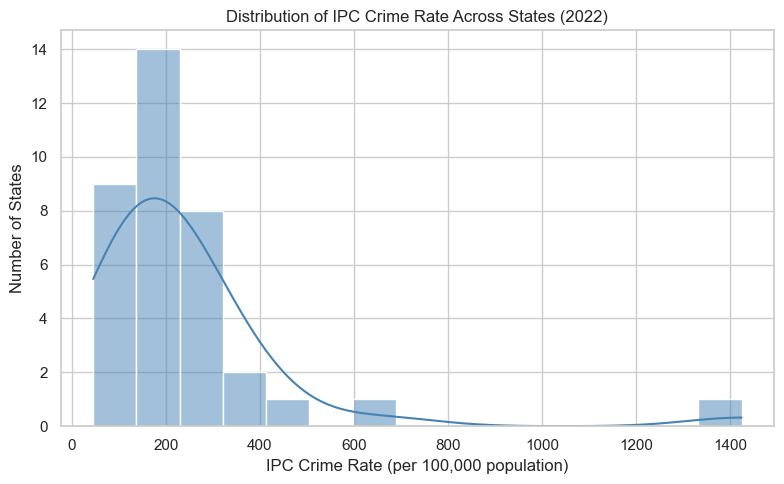

In [8]:
#Horizontal Bar – Top IPC Crime States
plt.figure(figsize=(8,5))
sns.histplot(
    clean_master["Rate of Cognizable Crimes (IPC) (2022)"],
    bins=15,
    kde=True,
    color="steelblue"
)
plt.title("Distribution of IPC Crime Rate Across States (2022)")
plt.xlabel("IPC Crime Rate (per 100,000 population)")
plt.ylabel("Number of States")
plt.tight_layout()
plt.show()



IPC crime rates vary widely across states, indicating that population-normalized crime burden is unevenly distributed.

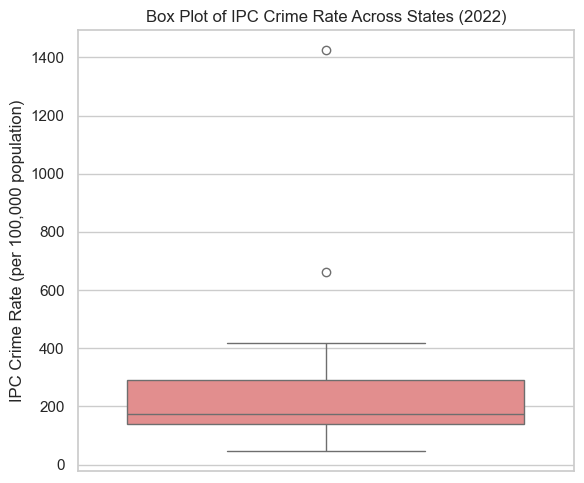

In [9]:
#Box & Whisker Plot – IPC Crime Rate (2022)
plt.figure(figsize=(6,5))
sns.boxplot(
    y=clean_master["Rate of Cognizable Crimes (IPC) (2022)"],
    color="lightcoral"
)
plt.title("Box Plot of IPC Crime Rate Across States (2022)")
plt.ylabel("IPC Crime Rate (per 100,000 population)")
plt.tight_layout()
plt.show()

The box plot highlights the presence of outlier states with exceptionally high IPC crime rates compared to the national spread

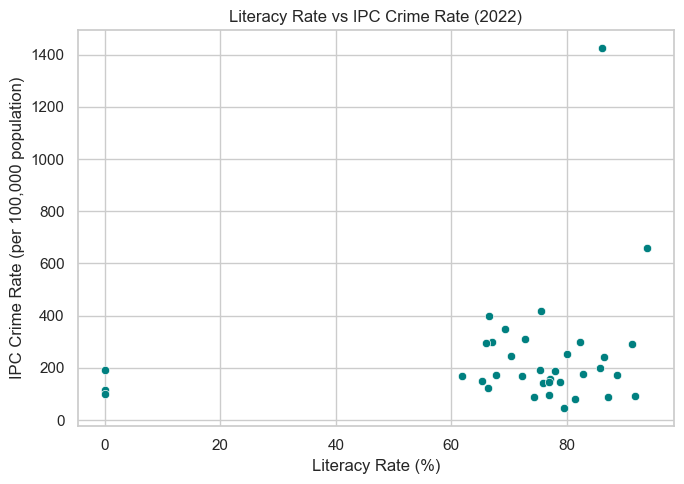

In [10]:
#Scatter Plot – Literacy Rate vs IPC Crime Rate (2022)
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=clean_master,
    x="literacy_rate_2011",
    y="Rate of Cognizable Crimes (IPC) (2022)",
    color="teal"
)
plt.title("Literacy Rate vs IPC Crime Rate (2022)")
plt.xlabel("Literacy Rate (%)")
plt.ylabel("IPC Crime Rate (per 100,000 population)")
plt.tight_layout()
plt.show()

The scatter plot shows a mixed relationship between literacy levels and IPC crime rates, suggesting that literacy alone does not determine crime incidence.

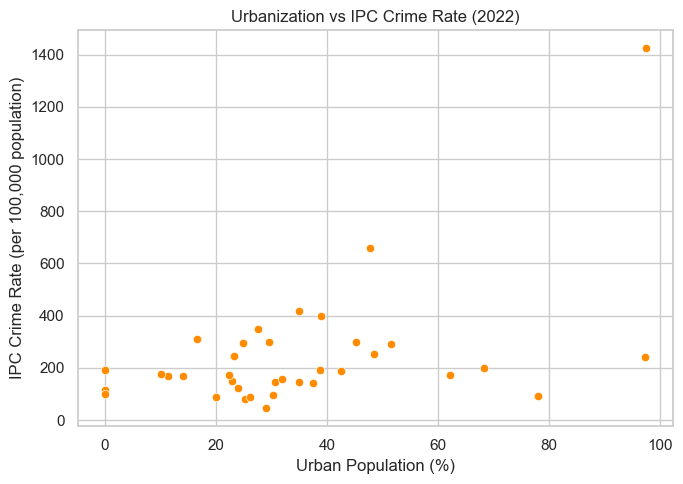

In [11]:
#Scatter Plot – Urbanization vs IPC Crime Rate (2022)
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=clean_master,
    x="urbanization_rate_2011",
    y="Rate of Cognizable Crimes (IPC) (2022)",
    color="darkorange"
)
plt.title("Urbanization vs IPC Crime Rate (2022)")
plt.xlabel("Urban Population (%)")
plt.ylabel("IPC Crime Rate (per 100,000 population)")
plt.tight_layout()
plt.show()

States with higher levels of urbanization generally tend to report higher IPC crime rates, indicating a possible link between urban concentration and crime incidence.

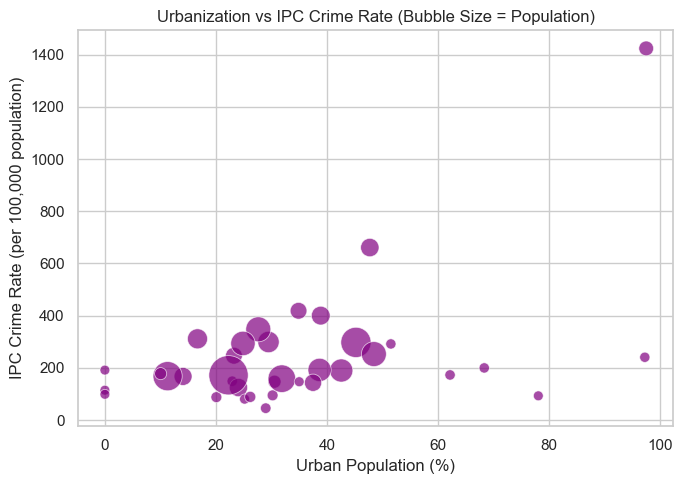

In [12]:
#Bubble Chart – Urbanization vs IPC Crime Rate (Bubble Size = Population)
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=clean_master,
    x="urbanization_rate_2011",
    y="Rate of Cognizable Crimes (IPC) (2022)",
    size="population_2011",
    sizes=(50, 800),
    alpha=0.7,
    color="purple",
    legend=False
)
plt.title("Urbanization vs IPC Crime Rate (Bubble Size = Population)")
plt.xlabel("Urban Population (%)")
plt.ylabel("IPC Crime Rate (per 100,000 population)")
plt.tight_layout()
plt.show()




Larger and more populous states with higher urbanization tend to cluster at higher crime rates, indicating the combined influence of population size and urban concentration on crime.

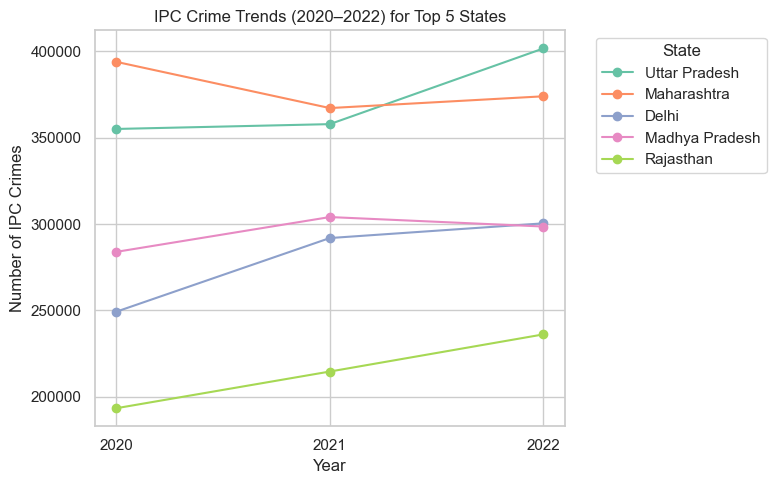

In [13]:
#Line Chart – IPC Crime Trend (2020–2022) for Top 5 States
top5 = clean_master.sort_values("2022", ascending=False).head(5)

plt.figure(figsize=(8,5))
for _, row in top5.iterrows():
    plt.plot(
        ["2020", "2021", "2022"],
        [row["2020"], row["2021"], row["2022"]],
        marker="o",
        label=row["state_ut"]
    )

plt.title("IPC Crime Trends (2020–2022) for Top 5 States")
plt.xlabel("Year")
plt.ylabel("Number of IPC Crimes")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Most high-crime states show a consistent or increasing trend in IPC crime counts over the three-year period, indicating persistent crime patterns rather than isolated spikes.

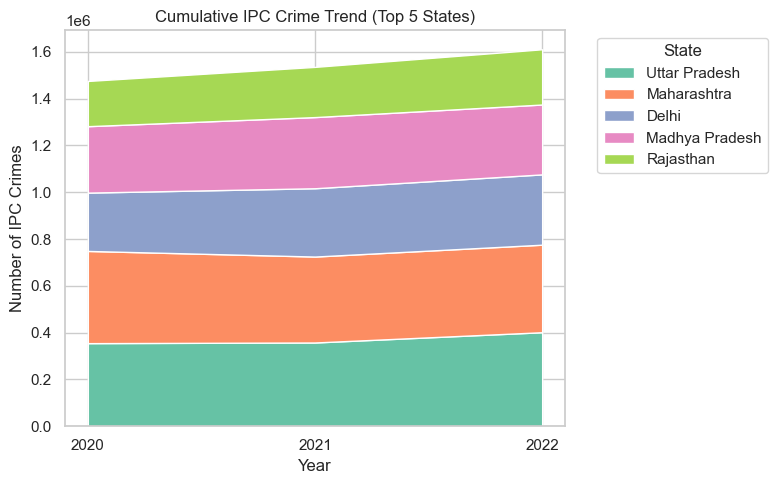

In [14]:
#Area Chart – Cumulative IPC Crime Trend (Top 5 States, 2020–2022)
top5 = clean_master.sort_values("2022", ascending=False).head(5)

years = ["2020", "2021", "2022"]
values = top5[years].values   # shape: (5 states × 3 years)

plt.figure(figsize=(8,5))
plt.stackplot(
    years,
    *values,                  # unpack each state's values as separate argument
    labels=top5["state_ut"]
)

plt.title("Cumulative IPC Crime Trend (Top 5 States)")
plt.xlabel("Year")
plt.ylabel("Number of IPC Crimes")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


The area chart shows that a small set of states consistently contributes the majority share of IPC crimes over time, reinforcing long-term concentration patterns.

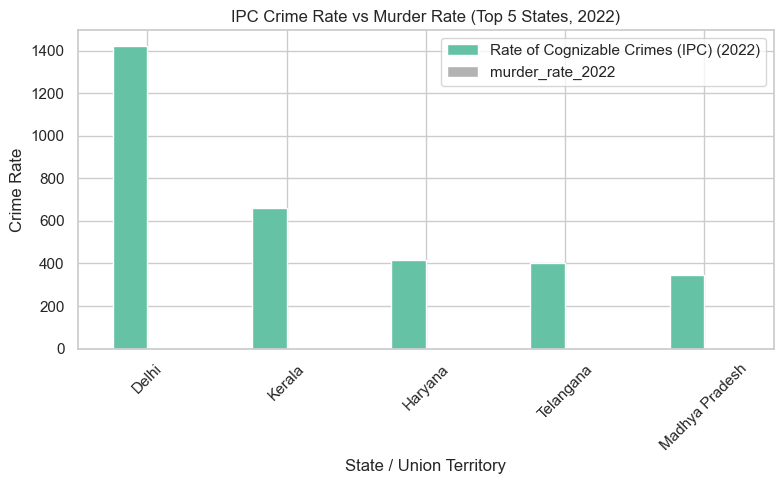

In [15]:
#Stacked Bar Chart – IPC vs SLL Crime Rates (2022)
top5 = clean_master.sort_values("Rate of Cognizable Crimes (IPC) (2022)", ascending=False).head(5)

plot_df = top5.set_index("state_ut")[
    ["Rate of Cognizable Crimes (IPC) (2022)", "murder_rate_2022"]
]

plot_df.plot(
    kind="bar",
    figsize=(8,5),
    colormap="Set2"
)

plt.title("IPC Crime Rate vs Murder Rate (Top 5 States, 2022)")
plt.xlabel("State / Union Territory")
plt.ylabel("Crime Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



States with high IPC crime rates also tend to report substantial SLL crime rates, indicating broader law enforcement and regulatory challenges.

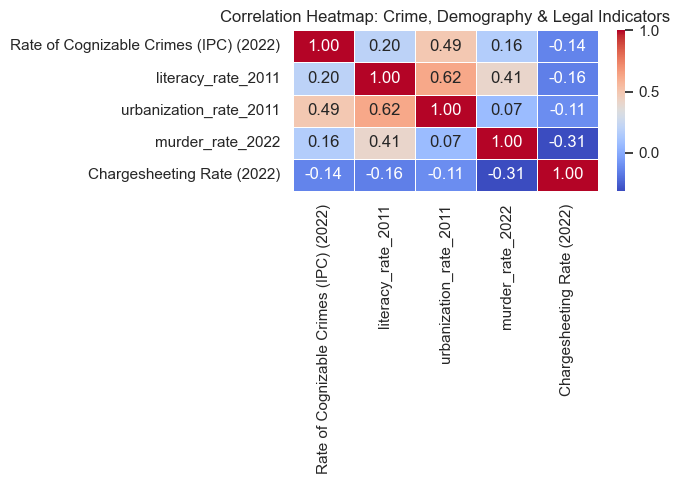

In [16]:
#Heatmap – Correlation Between Crime and Socio-Demographic Variables
corr_cols = [
    "Rate of Cognizable Crimes (IPC) (2022)",
    "literacy_rate_2011",
    "urbanization_rate_2011",
    "murder_rate_2022",
    "Chargesheeting Rate (2022)"
]

plt.figure(figsize=(7,5))
sns.heatmap(
    clean_master[corr_cols].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap: Crime, Demography & Legal Indicators")
plt.tight_layout()
plt.show()

Urbanization shows a stronger positive association with IPC crime rates compared to literacy, while chargesheeting rates exhibit weaker correlation with overall crime incidence.

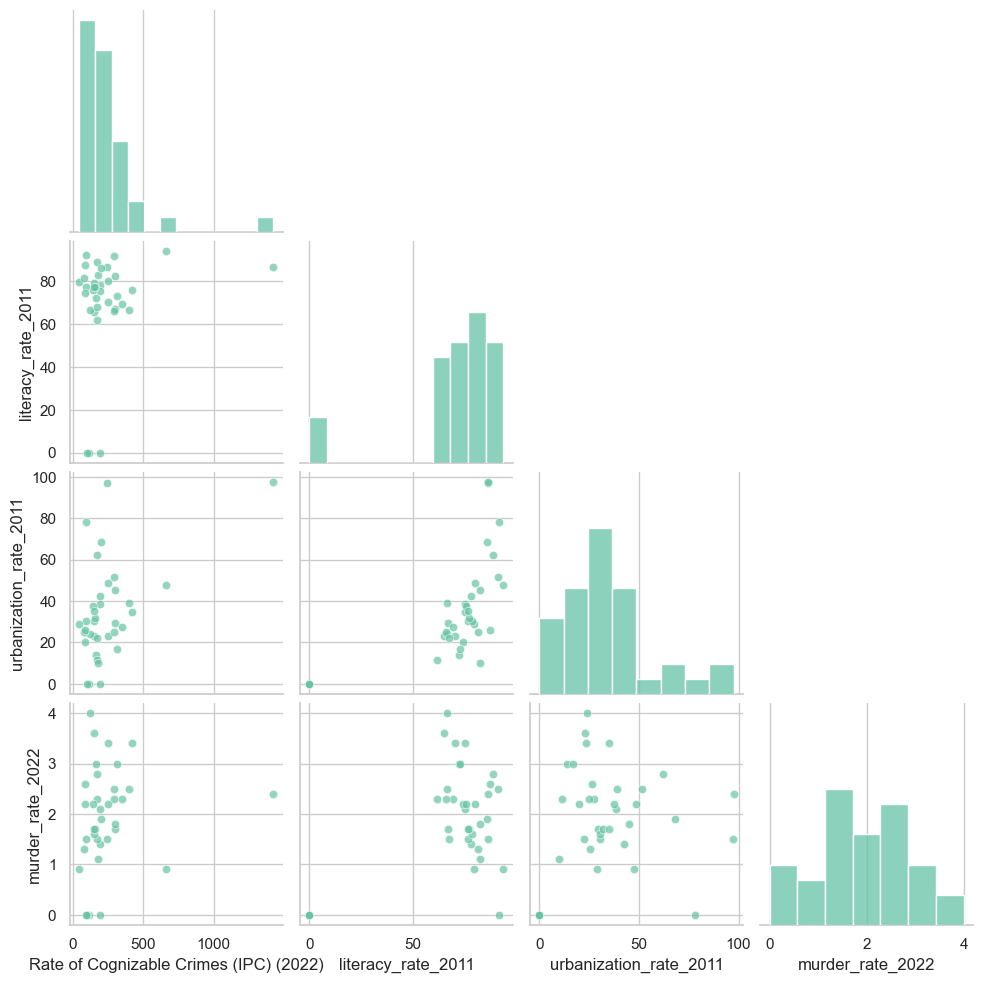

In [17]:
#Pair Plot – Multivariate Relationships
sns.pairplot(
    clean_master[
        [
            "Rate of Cognizable Crimes (IPC) (2022)",
            "literacy_rate_2011",
            "urbanization_rate_2011",
            "murder_rate_2022"
        ]
    ],
    corner=True,
    plot_kws={"alpha": 0.7}
)
plt.show()

The pair plot reveals varying strengths of relationships among crime rates and socio-demographic variables, with urbanization showing more consistent patterns compared to literacy.

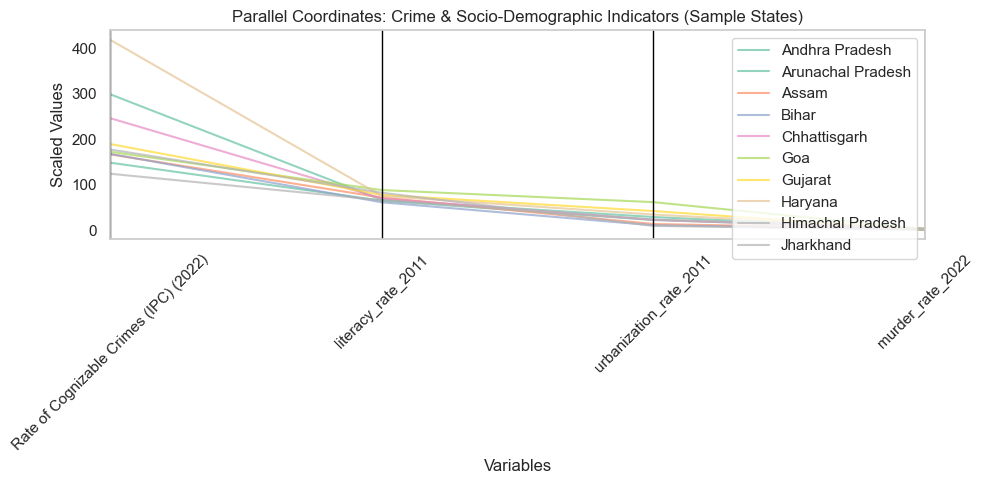

In [18]:
#Parallel Coordinates Plot – High-Dimensional Crime Profile
from pandas.plotting import parallel_coordinates

pc_data = clean_master[
    [
        "state_ut",
        "Rate of Cognizable Crimes (IPC) (2022)",
        "literacy_rate_2011",
        "urbanization_rate_2011",
        "murder_rate_2022"
    ]
].head(10)   # limit to avoid clutter

plt.figure(figsize=(10,5))
parallel_coordinates(
    pc_data,
    class_column="state_ut",
    colormap="Set2",
    alpha=0.7
)
plt.title("Parallel Coordinates: Crime & Socio-Demographic Indicators (Sample States)")
plt.xlabel("Variables")
plt.ylabel("Scaled Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The parallel coordinates plot highlights how states differ across multiple crime and demographic indicators simultaneously, revealing distinct multi-variable crime profiles.

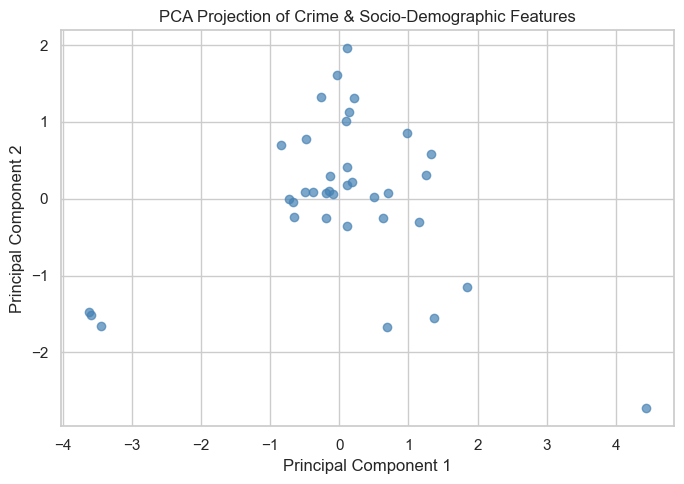

In [19]:
#PCA Scatter Plot – Dimensionality Reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = clean_master[
    [
        "Rate of Cognizable Crimes (IPC) (2022)",
        "literacy_rate_2011",
        "urbanization_rate_2011",
        "murder_rate_2022"
    ]
]

X_scaled = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c="steelblue",
    alpha=0.7
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Crime & Socio-Demographic Features")
plt.tight_layout()
plt.show()

The PCA plot compresses multiple crime and demographic variables into two dimensions, showing how states differ in overall crime–socioeconomic profiles without strong linear separation.

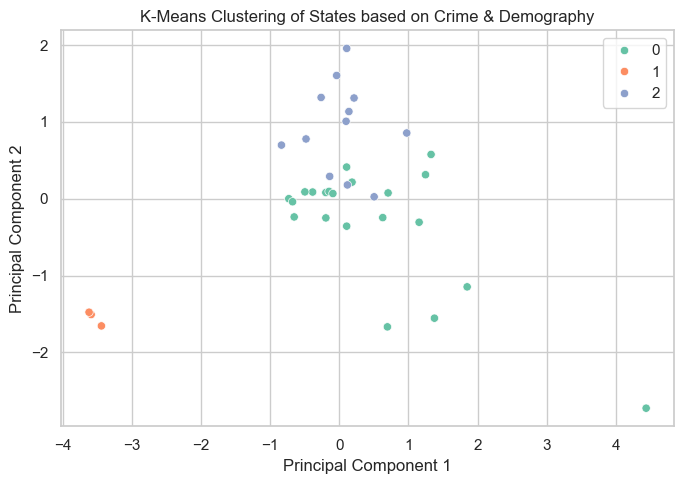

In [20]:
#K-Means Clustering Visualization (on PCA Space)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=clusters,
    palette="Set2",
    legend="full"
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering of States based on Crime & Demography")
plt.tight_layout()
plt.show()

The clustering reveals groups of states with similar crime and socio-demographic characteristics, indicating that crime patterns tend to form distinct state-level profiles.

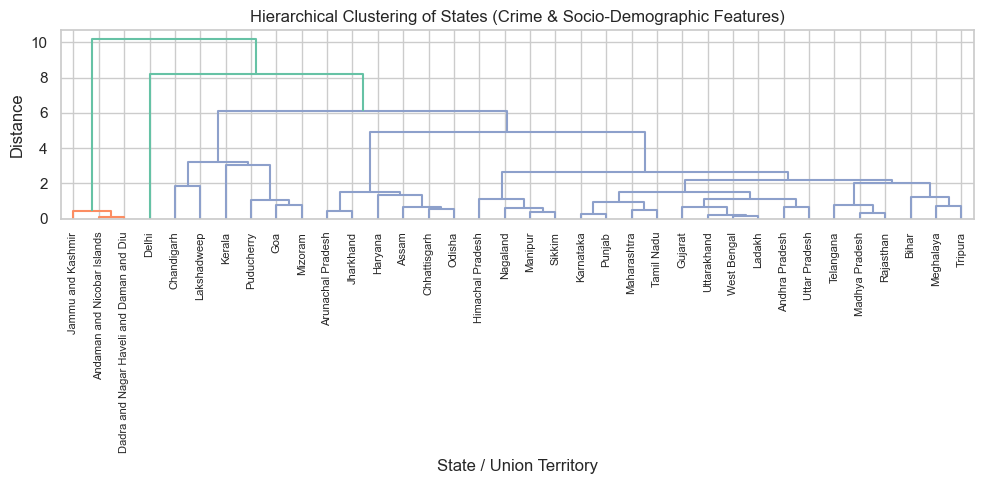

In [21]:
#Hierarchical Clustering – Dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(X_scaled, method="ward")

plt.figure(figsize=(10,5))
dendrogram(
    linked,
    labels=clean_master["state_ut"].values,
    leaf_rotation=90,
    leaf_font_size=8
)
plt.title("Hierarchical Clustering of States (Crime & Socio-Demographic Features)")
plt.xlabel("State / Union Territory")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

The dendrogram shows how states cluster hierarchically based on crime and socio-demographic similarities, with certain groups merging at lower distances, indicating closer resemblance.

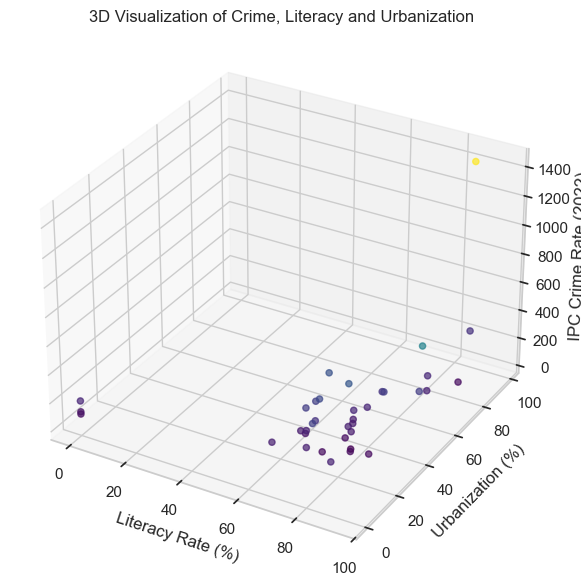

In [22]:
#3D Scatter Plot – Literacy, Urbanization & IPC Crime Rate (2022)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    clean_master["literacy_rate_2011"],
    clean_master["urbanization_rate_2011"],
    clean_master["Rate of Cognizable Crimes (IPC) (2022)"],
    c=clean_master["Rate of Cognizable Crimes (IPC) (2022)"],
    cmap="viridis",
    alpha=0.7
)

ax.set_xlabel("Literacy Rate (%)")
ax.set_ylabel("Urbanization (%)")
ax.set_zlabel("IPC Crime Rate (2022)")
ax.set_title("3D Visualization of Crime, Literacy and Urbanization")

plt.tight_layout()
plt.show()

The 3D plot illustrates how IPC crime rates vary jointly with literacy and urbanization, with higher crime concentrations generally appearing in more urbanized states.

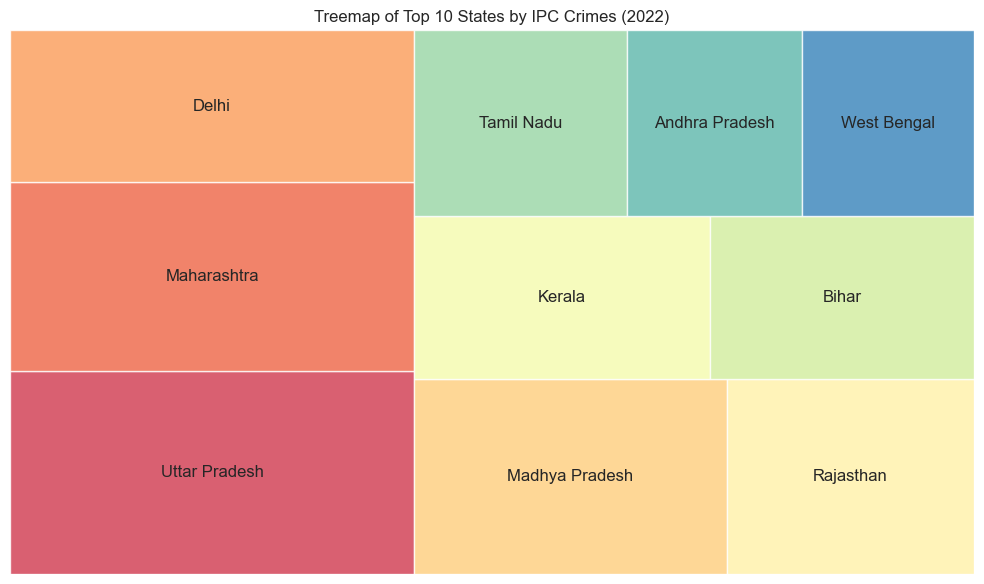

In [23]:
#Treemap-Style Visualization – Top States by IPC Crimes (2022)
import squarify

top10 = clean_master.sort_values("2022", ascending=False).head(10)

plt.figure(figsize=(10,6))
squarify.plot(
    sizes=top10["2022"],
    label=top10["state_ut"],
    color=sns.color_palette("Spectral", len(top10)),
    alpha=0.8
)

plt.title("Treemap of Top 10 States by IPC Crimes (2022)")
plt.axis("off")
plt.tight_layout()
plt.show()

The treemap clearly shows that a few states occupy a much larger share of total IPC crimes, visually emphasizing the concentration of crime burden.

C:\Users\Gayatri\AppData\Local\Temp\ipykernel_6748\220648558.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


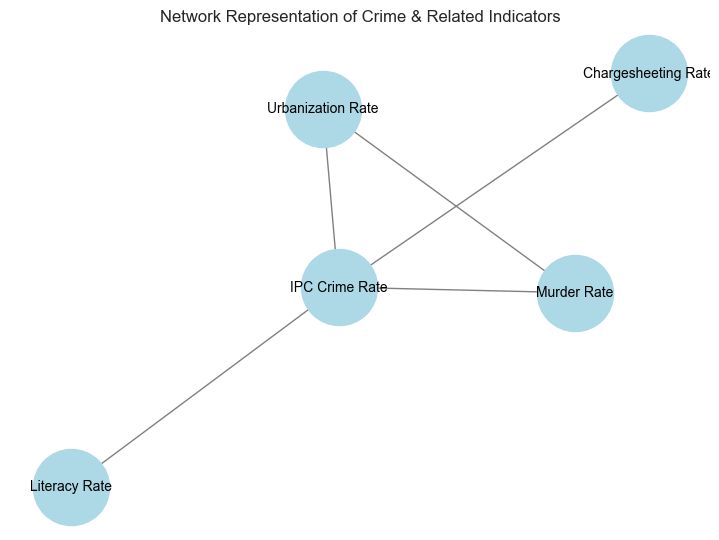

In [24]:
#Network Diagram – Relationship Between Crime & Socio-Demographic Indicators
import networkx as nx

G = nx.Graph()

# nodes
G.add_node("IPC Crime Rate")
G.add_node("Murder Rate")
G.add_node("Literacy Rate")
G.add_node("Urbanization Rate")
G.add_node("Chargesheeting Rate")

# edges (conceptual relationships)
G.add_edges_from([
    ("IPC Crime Rate", "Urbanization Rate"),
    ("IPC Crime Rate", "Literacy Rate"),
    ("IPC Crime Rate", "Murder Rate"),
    ("IPC Crime Rate", "Chargesheeting Rate"),
    ("Murder Rate", "Urbanization Rate")
])

plt.figure(figsize=(7,5))
pos = nx.spring_layout(G, seed=42)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=3000,
    font_size=10,
    edge_color="gray"
)

plt.title("Network Representation of Crime & Related Indicators")
plt.tight_layout()
plt.show()

The network diagram highlights how IPC crime rates are interconnected with multiple socio-demographic and legal indicators, emphasizing the multidimensional nature of crime analysis.

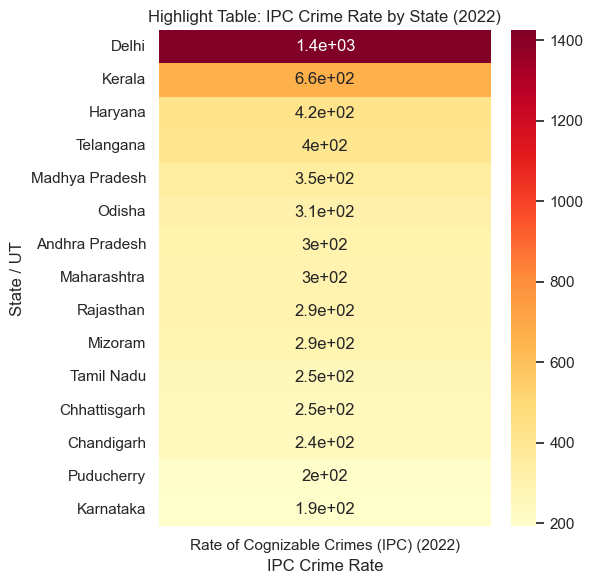

In [25]:
#Highlight Table – IPC Crime Rate by State (Top 15)
top15 = clean_master.sort_values(
    "Rate of Cognizable Crimes (IPC) (2022)", ascending=False
).head(15)

plt.figure(figsize=(6,6))
sns.heatmap(
    top15[["Rate of Cognizable Crimes (IPC) (2022)"]],
    annot=True,
    cmap="YlOrRd",
    cbar=True,
    yticklabels=top15["state_ut"]
)
plt.title("Highlight Table: IPC Crime Rate by State (2022)")
plt.xlabel("IPC Crime Rate")
plt.ylabel("State / UT")
plt.tight_layout()
plt.show()

The highlight table emphasizes sharp contrasts in IPC crime rates across states, making high-crime states immediately identifiable.

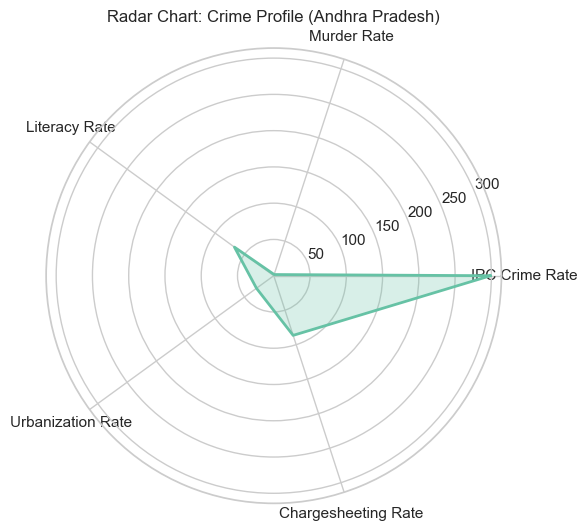

In [26]:
#Radar Chart – Crime & Socio-Demographic Profile (Sample State)
import numpy as np

state = clean_master.iloc[0]  # sample state

labels = [
    "IPC Crime Rate",
    "Murder Rate",
    "Literacy Rate",
    "Urbanization Rate",
    "Chargesheeting Rate"
]

values = [
    state["Rate of Cognizable Crimes (IPC) (2022)"],
    state["murder_rate_2022"],
    state["literacy_rate_2011"],
    state["urbanization_rate_2011"],
    state["Chargesheeting Rate (2022)"]
]

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
values += values[:1]
angles = np.concatenate([angles, [angles[0]]])

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(angles[:-1] * 180/np.pi, labels)
ax.set_title(f"Radar Chart: Crime Profile ({state['state_ut']})")

plt.tight_layout()
plt.show()

The radar chart provides a compact multi-indicator profile of a state, allowing quick comparison of crime intensity, severity, and socio-demographic characteristics.

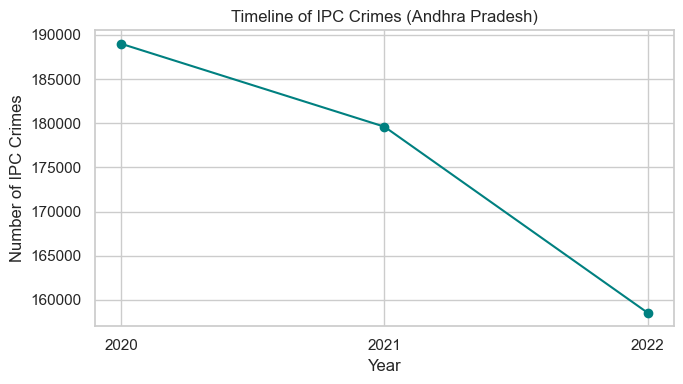

In [27]:
#Timeline Plot – IPC Crime Trend for a Sample State (2020–2022)
sample_state = clean_master.iloc[0]

years = ["2020", "2021", "2022"]
values = [
    sample_state["2020"],
    sample_state["2021"],
    sample_state["2022"]
]

plt.figure(figsize=(7,4))
plt.plot(years, values, marker="o", color="teal")
plt.title(f"Timeline of IPC Crimes ({sample_state['state_ut']})")
plt.xlabel("Year")
plt.ylabel("Number of IPC Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()

The timeline shows how IPC crime levels for a single state change over time, helping identify whether crime trends are increasing, decreasing, or stable.

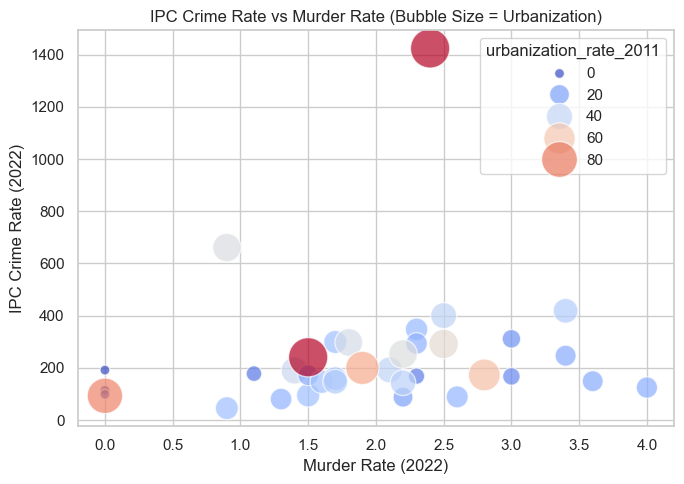

In [28]:
#Bubble Chart – IPC Crime Rate vs Murder Rate (Bubble Size = Urbanization)
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=clean_master,
    x="murder_rate_2022",
    y="Rate of Cognizable Crimes (IPC) (2022)",
    size="urbanization_rate_2011",
    sizes=(50, 800),
    alpha=0.7,
    hue="urbanization_rate_2011",
    palette="coolwarm"
)
plt.title("IPC Crime Rate vs Murder Rate (Bubble Size = Urbanization)")
plt.xlabel("Murder Rate (2022)")
plt.ylabel("IPC Crime Rate (2022)")
plt.tight_layout()
plt.show()

States with higher murder rates often align with higher IPC crime rates, while urbanization further differentiates the overall crime burden.

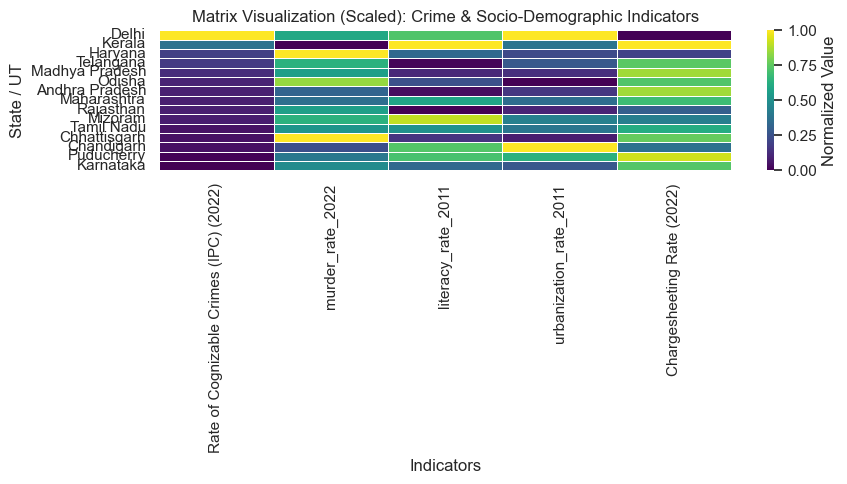

In [29]:
#Matrix Visualization (Scaled + Top 15 States only)
from sklearn.preprocessing import MinMaxScaler

cols = [
    "Rate of Cognizable Crimes (IPC) (2022)",
    "murder_rate_2022",
    "literacy_rate_2011",
    "urbanization_rate_2011",
    "Chargesheeting Rate (2022)"
]

top15 = clean_master.sort_values(
    "Rate of Cognizable Crimes (IPC) (2022)", ascending=False
).head(15)

# scale values for visual clarity
scaled = MinMaxScaler().fit_transform(top15[cols])
scaled_df = pd.DataFrame(scaled, columns=cols, index=top15["state_ut"])

plt.figure(figsize=(9,5))
sns.heatmap(
    scaled_df,
    cmap="viridis",
    linewidths=0.5,
    cbar_kws={"label": "Normalized Value"}
)
plt.title("Matrix Visualization (Scaled): Crime & Socio-Demographic Indicators")
plt.xlabel("Indicators")
plt.ylabel("State / UT")
plt.tight_layout()
plt.show()

After normalization, the matrix clearly highlights relative differences across states, showing distinct crime–demography patterns rather than absolute magnitude dominance.

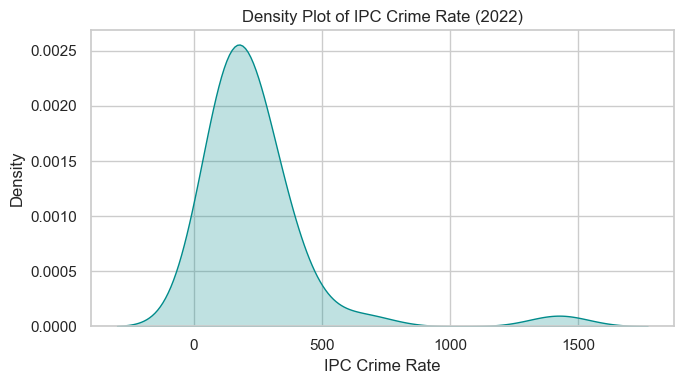

In [30]:
#Density Plot – IPC Crime Rate Distribution
plt.figure(figsize=(7,4))
sns.kdeplot(
    clean_master["Rate of Cognizable Crimes (IPC) (2022)"],
    fill=True,
    color="darkcyan"
)
plt.title("Density Plot of IPC Crime Rate (2022)")
plt.xlabel("IPC Crime Rate")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

The density curve indicates that most states cluster around moderate IPC crime rates, with a long tail representing high-crime states.

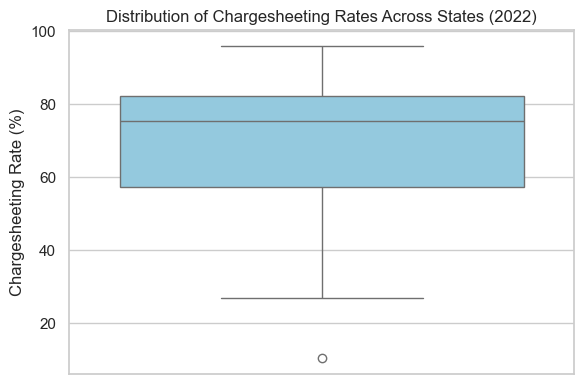

In [31]:
#Box Plot – Chargesheeting Rate Across States (2022)
plt.figure(figsize=(6,4))
sns.boxplot(
    y=clean_master["Chargesheeting Rate (2022)"],
    color="skyblue"
)
plt.title("Distribution of Chargesheeting Rates Across States (2022)")
plt.ylabel("Chargesheeting Rate (%)")
plt.tight_layout()
plt.show()

Chargesheeting rates show noticeable variability across states, indicating differences in investigation efficiency and legal follow-through.

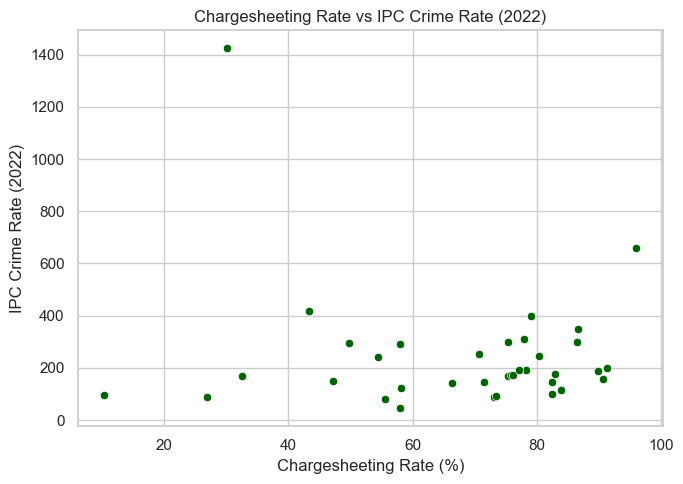

In [32]:
#Scatter Plot – Chargesheeting Rate vs IPC Crime Rate
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=clean_master,
    x="Chargesheeting Rate (2022)",
    y="Rate of Cognizable Crimes (IPC) (2022)",
    color="darkgreen"
)
plt.title("Chargesheeting Rate vs IPC Crime Rate (2022)")
plt.xlabel("Chargesheeting Rate (%)")
plt.ylabel("IPC Crime Rate (2022)")
plt.tight_layout()
plt.show()

The weak and scattered pattern suggests that higher crime rates do not necessarily correspond to higher chargesheeting efficiency.

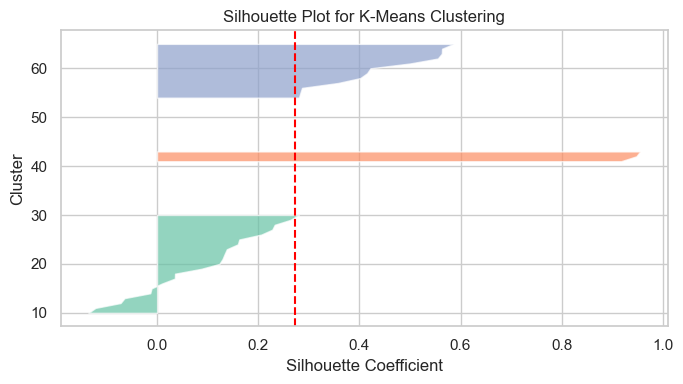

In [33]:
#Silhouette Plot – Cluster Validation (K-Means)
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_vals = silhouette_samples(X_scaled, clusters)
silhouette_avg = silhouette_score(X_scaled, clusters)

plt.figure(figsize=(7,4))
y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = silhouette_vals[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7
    )
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

The silhouette plot indicates moderate cluster separation, suggesting that states form distinguishable but partially overlapping crime–demography groups.

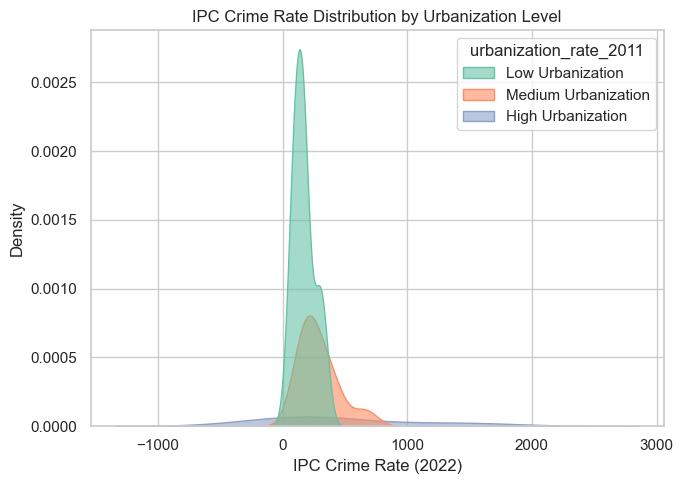

In [34]:
#KDE Plot – IPC Crime Rate by Urbanization Level
plt.figure(figsize=(7,5))
sns.kdeplot(
    data=clean_master,
    x="Rate of Cognizable Crimes (IPC) (2022)",
    hue=pd.cut(
        clean_master["urbanization_rate_2011"],
        bins=3,
        labels=["Low Urbanization", "Medium Urbanization", "High Urbanization"]
    ),
    fill=True,
    alpha=0.6
)
plt.title("IPC Crime Rate Distribution by Urbanization Level")
plt.xlabel("IPC Crime Rate (2022)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Highly urbanized states tend to exhibit a right-shifted crime rate distribution, indicating relatively higher IPC crime burdens compared to less urbanized states.

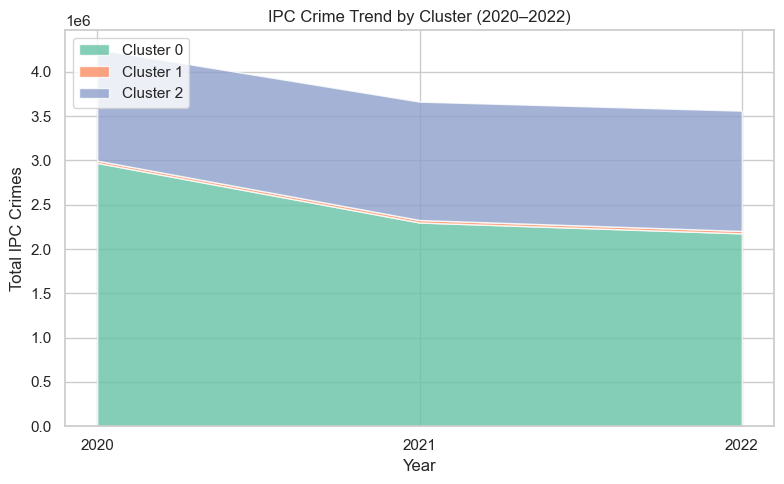

In [35]:
#Stacked Area Chart – IPC Crime Trend by Cluster (2020–2022)

cluster_df = clean_master.copy()
cluster_df["cluster"] = clusters

cluster_trend = (
    cluster_df
    .groupby("cluster")[["2020", "2021", "2022"]]
    .sum()
)

plt.figure(figsize=(8,5))
plt.stackplot(
    ["2020", "2021", "2022"],
    cluster_trend.values,
    labels=[f"Cluster {i}" for i in cluster_trend.index],
    alpha=0.8
)

plt.title("IPC Crime Trend by Cluster (2020–2022)")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

Different state clusters exhibit distinct crime trajectories over time, indicating that crime evolution varies across groups with similar socio-demographic characteristics.

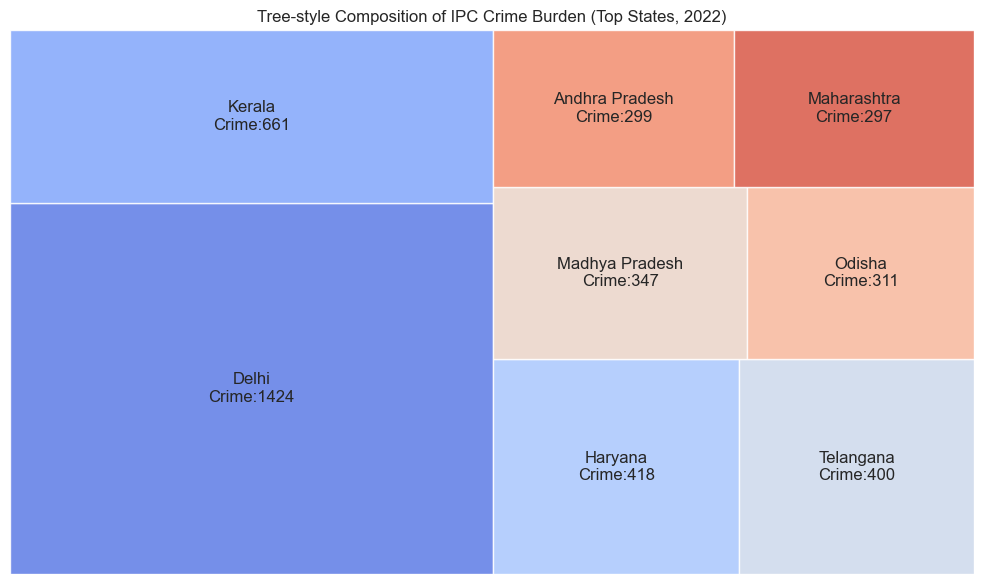

In [36]:
#Sunburst / Tree-style Composition – Crime & Demography (Conceptual)

import squarify

tree_data = clean_master.sort_values(
    "Rate of Cognizable Crimes (IPC) (2022)", ascending=False
).head(8)

sizes = tree_data["Rate of Cognizable Crimes (IPC) (2022)"]
labels = [
    f"{state}\nCrime:{int(crime)}"
    for state, crime in zip(tree_data["state_ut"], sizes)
]

plt.figure(figsize=(10,6))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=sns.color_palette("coolwarm", len(sizes)),
    alpha=0.85
)

plt.title("Tree-style Composition of IPC Crime Burden (Top States, 2022)")
plt.axis("off")
plt.tight_layout()
plt.show()

The tree-style visualization highlights the hierarchical dominance of a few states in contributing to the overall IPC crime burden.

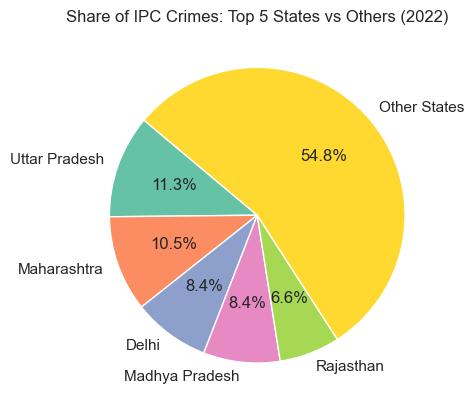

In [37]:
top5 = clean_master.sort_values("2022", ascending=False).head(5)
others = clean_master["2022"].sum() - top5["2022"].sum()

plt.pie(
    list(top5["2022"]) + [others],
    labels=list(top5["state_ut"]) + ["Other States"],
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Share of IPC Crimes: Top 5 States vs Others (2022)")
plt.show()


A small number of states account for a large share of total IPC crimes.

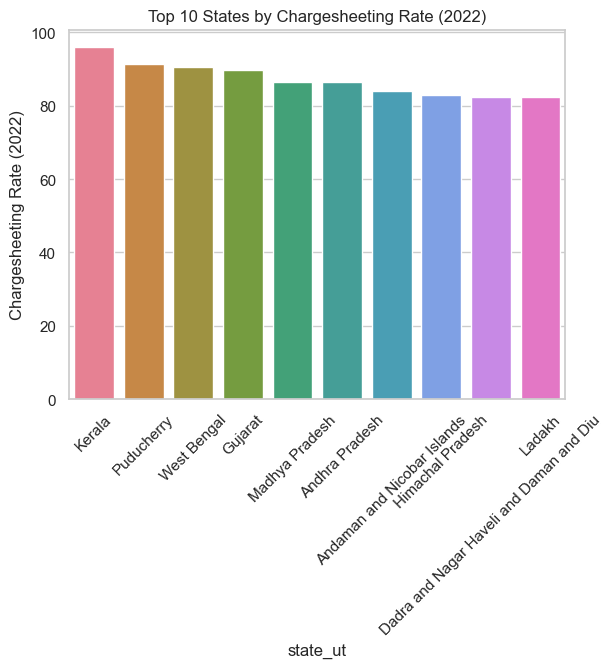

In [38]:
sns.barplot(
    data=clean_master.sort_values("Chargesheeting Rate (2022)", ascending=False).head(10),
    x="state_ut",
    y="Chargesheeting Rate (2022)",
    hue="state_ut",
    legend=False
)
plt.xticks(rotation=45)
plt.title("Top 10 States by Chargesheeting Rate (2022)")
plt.show()

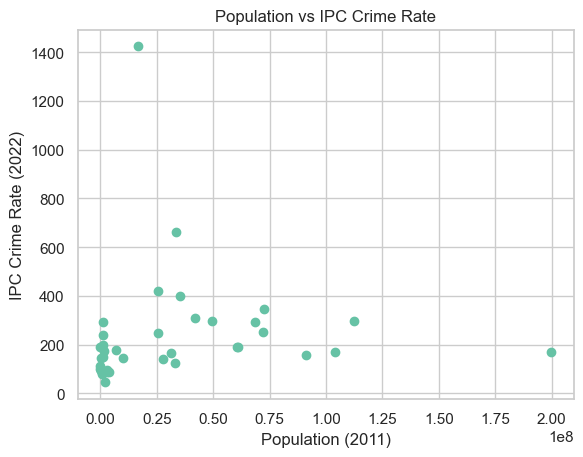

In [39]:
plt.scatter(
    clean_master["population_2011"],
    clean_master["Rate of Cognizable Crimes (IPC) (2022)"]
)
plt.xlabel("Population (2011)")
plt.ylabel("IPC Crime Rate (2022)")
plt.title("Population vs IPC Crime Rate")
plt.show()

Population size alone does not fully explain crime rate variation across states.